In [3]:
import pandas as pd

In [4]:
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [5]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [6]:
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [7]:
#Exibindo as 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [8]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
195,Natal,2019-01-02,44.89,1036,3
118,Salvador,2019-03-02,92.21,1035,2
21,Recife,2019-01-01,164.74,983,1
209,Natal,2019-01-02,69.98,1034,2
2,Recife,2019-02-10,12.94,983,5


In [9]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [10]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [11]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [12]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [13]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [14]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [15]:
#Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [16]:
#Apagando as linhas com valores nulos
df.dropna(subset=["Vendas"], inplace=True)

In [17]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

In [18]:
#Criando a coluna Receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [19]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [20]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [21]:
#Retornando a menor receita
df["Vendas"].min()

3.01

In [22]:
#nlargest
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [23]:
#nsmallest
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [24]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [25]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [26]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

C:\Users\VITALI\AppData\Local\Temp/ipykernel_41024/2177900953.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df["Data"] = df["Data"].astype("int64")


In [27]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [28]:
#Transformando a coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [29]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [30]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [31]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [44]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
34,Aracaju,2018-01-01,38.25,1521,6,229.50,2018
152,Salvador,2019-01-02,20.07,1035,1,20.07,2019
72,Salvador,2019-01-01,149.47,1036,3,448.41,2019
21,Fortaleza,2019-01-01,40.63,1004,3,121.89,2019
57,Fortaleza,2019-01-01,129.07,1005,3,387.21,2019


In [46]:
#Extraindo o mês e o dia 
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [52]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
132,Salvador,2019-03-02,19.61,1036,2,39.22,2019,3,2
136,Recife,2019-03-02,39.09,982,4,156.36,2019,3,2
85,Aracaju,2018-01-01,15.17,1521,1,15.17,2018,1,1
124,Recife,2019-03-02,47.98,983,7,335.86,2019,3,2
38,Natal,2018-02-25,828.00,852,4,3312.00,2018,2,25


In [53]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [54]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [58]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias
22,Fortaleza,2019-01-01,150.32,1005,1,150.32,2019,1,1,365 days
37,Recife,2019-01-01,136.36,980,7,954.52,2019,1,1,365 days
138,Fortaleza,2019-03-02,150.38,983,6,902.28,2019,3,2,425 days
84,Fortaleza,2019-01-01,147.46,1003,6,884.76,2019,1,1,365 days
27,Natal,2018-07-16,390.00,853,3,1170.00,2018,7,16,196 days


In [59]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [67]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
12,Salvador,2019-01-01,125.05,1034,3,375.15,2019,1,1,365 days,1
175,Salvador,2019-01-02,16.53,1036,2,33.06,2019,1,2,366 days,1
107,Aracaju,2018-01-01,142.57,1523,3,427.71,2018,1,1,0 days,1
99,Natal,2019-01-02,40.38,1037,1,40.38,2019,1,2,366 days,1
118,Fortaleza,2019-03-02,17.70,981,5,88.50,2019,3,2,425 days,1


In [80]:
#Filtrando as vendas de 2019 do mês março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [81]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


In [82]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot:>

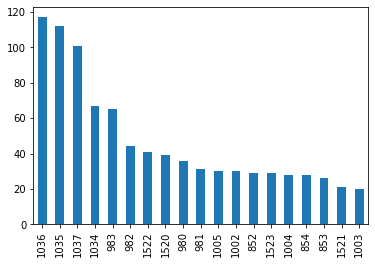

In [83]:
df["LojaID"].value_counts(ascending=False).plot.bar()

<AxesSubplot:>

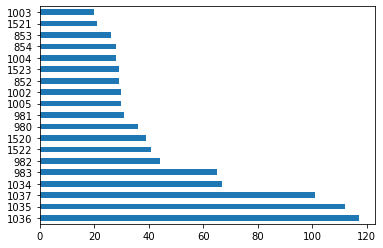

In [84]:
#Gráfico de barras horizontais
df["LojaID"].value_counts().plot.barh()

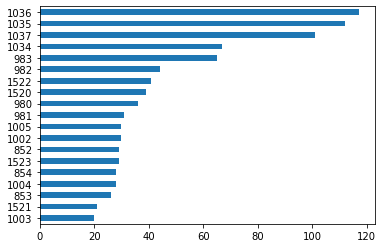

In [86]:
#Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

<AxesSubplot:ylabel='Receita'>

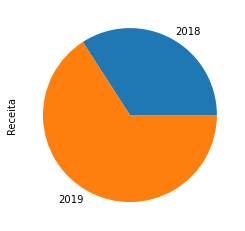

In [87]:
#Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [88]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

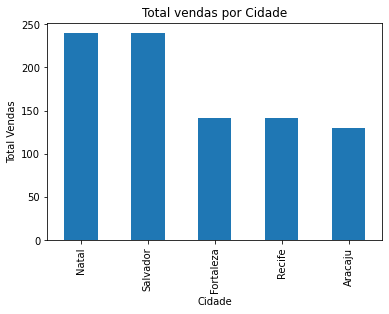

In [92]:
#Adicionando um título e alterando o nome dos elementos
import matplotlib.pyplot as plt

df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

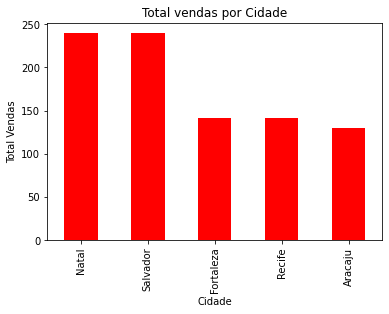

In [95]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [96]:
#Alterando o estilo
plt.style.use("ggplot")

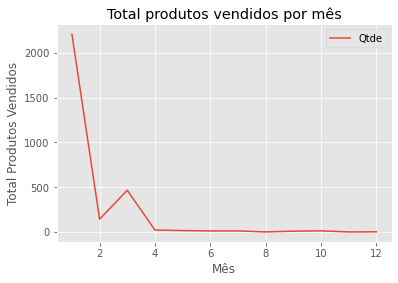

In [98]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [99]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [100]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

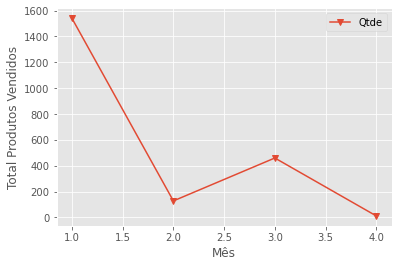

In [101]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

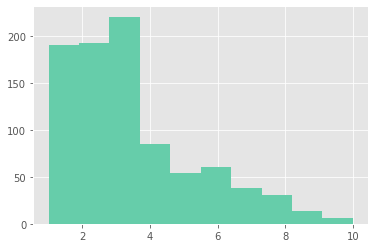

In [103]:
#Histograma
plt.hist(df["Qtde"], color="mediumaquamarine");

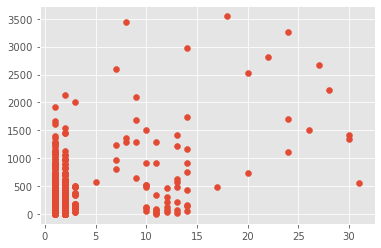

In [104]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

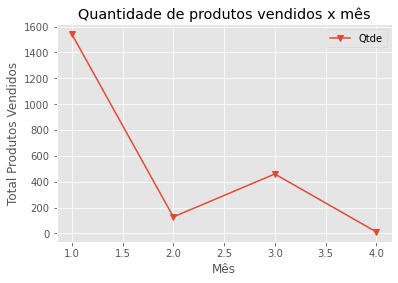

In [107]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")